In [1]:
import sys
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
sys.path.insert(0, '..')  # Add the parent dir to the system path
%reload_ext autoreload
%autoreload 2
%aimport helper

helper.info()

torch version: 2.3.0
device: cpu


In [3]:
class MyDataset(Dataset):
    def __init__(self, data):
        # data is a list of tuples (x, y)
        self.data = data

    def __len__(self):
        # Return the total number of samples
        return len(self.data)

    def __getitem__(self, idx):
        # Get the sample at the specified index
        x, y = self.data[idx]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step)
y = weight * X + bias

80 80 20 20


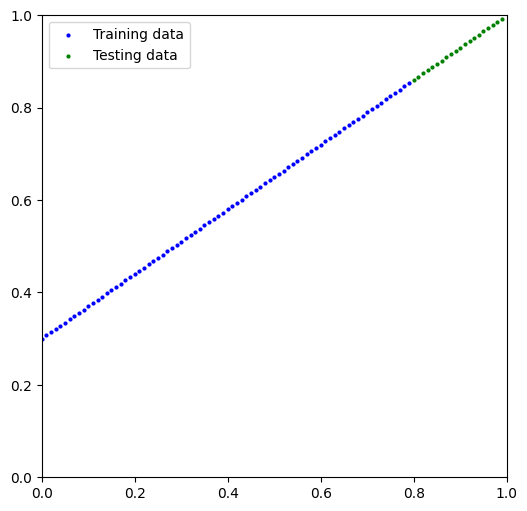

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))
helper.plot_predictions(X_train, y_train, X_test, y_test, None)

In [6]:
print('TRAIN DATA\n')
# train_ds = MyDataset(list(zip(X_train[:,0].numpy(),y_train[:,0].numpy())))
train_ds = TensorDataset(X_train, y_train)
print(f'dataset size: {len(train_ds)}')
train_dl = DataLoader(train_ds, batch_size=10, shuffle=True)
print(f'dataloader batches: {len(train_dl)}')
print()
for batch in train_dl:
    print(batch)

TRAIN DATA

dataset size: 80
dataloader batches: 8

[tensor([0.3100, 0.7400, 0.0300, 0.1100, 0.5700, 0.2000, 0.6600, 0.5200, 0.4600,
        0.3000]), tensor([0.5170, 0.8180, 0.3210, 0.3770, 0.6990, 0.4400, 0.7620, 0.6640, 0.6220,
        0.5100])]
[tensor([0.4400, 0.7700, 0.5000, 0.3600, 0.0600, 0.5500, 0.0800, 0.2800, 0.0200,
        0.6100]), tensor([0.6080, 0.8390, 0.6500, 0.5520, 0.3420, 0.6850, 0.3560, 0.4960, 0.3140,
        0.7270])]
[tensor([0.4500, 0.6900, 0.6800, 0.2500, 0.4800, 0.3500, 0.4700, 0.7200, 0.7600,
        0.1500]), tensor([0.6150, 0.7830, 0.7760, 0.4750, 0.6360, 0.5450, 0.6290, 0.8040, 0.8320,
        0.4050])]
[tensor([0.3200, 0.1600, 0.5600, 0.3400, 0.2200, 0.7800, 0.0700, 0.6700, 0.5300,
        0.4100]), tensor([0.5240, 0.4120, 0.6920, 0.5380, 0.4540, 0.8460, 0.3490, 0.7690, 0.6710,
        0.5870])]
[tensor([0.1800, 0.6400, 0.0100, 0.5400, 0.2900, 0.5800, 0.4000, 0.7100, 0.1200,
        0.1400]), tensor([0.4260, 0.7480, 0.3070, 0.6780, 0.5030, 0.7060, 0.580

In [7]:
print('TEST DATA\n')
# test_ds = MyDataset(list(zip(X_test[:,0].numpy(),y_test[:,0].numpy())))
test_ds = TensorDataset(X_test, y_test)
print(f'dataset size: {len(test_ds)}')
test_dl = DataLoader(test_ds, batch_size=10, shuffle=True)
print(f'dataloader batches: {len(test_dl)}')
print()
for batch in test_dl:
    print(batch)

TEST DATA

dataset size: 20
dataloader batches: 2

[tensor([0.9800, 0.8100, 0.8200, 0.9400, 0.8000, 0.9300, 0.9700, 0.9100, 0.8500,
        0.8600]), tensor([0.9860, 0.8670, 0.8740, 0.9580, 0.8600, 0.9510, 0.9790, 0.9370, 0.8950,
        0.9020])]
[tensor([0.8300, 0.9600, 0.8700, 0.9500, 0.9900, 0.8900, 0.9200, 0.8800, 0.8400,
        0.9000]), tensor([0.8810, 0.9720, 0.9090, 0.9650, 0.9930, 0.9230, 0.9440, 0.9160, 0.8880,
        0.9300])]


In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [9]:
torch.manual_seed(2)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3923])), ('bias', tensor([-0.2236]))])

CPU times: user 17.3 ms, sys: 876 µs, total: 18.1 ms
Wall time: 6.13 ms


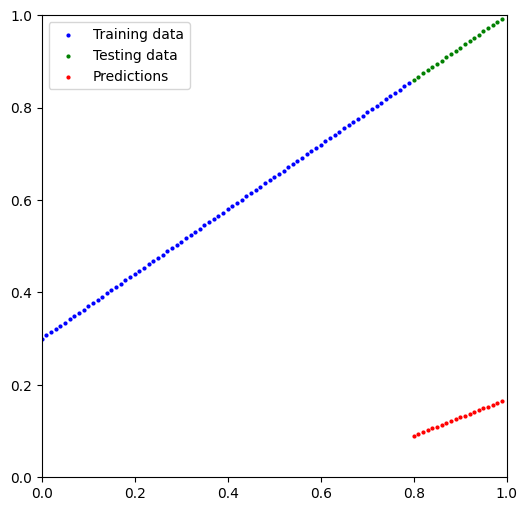

In [10]:
%%time
model_0.eval()
with torch.inference_mode(): 
    y_preds = model_0(X_test)

helper.plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [15]:
torch.manual_seed(2)

model_0 = LinearRegressionModel()
# loss_fn = nn.L1Loss() # MAE
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 600

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(1, epochs):
    for i, (inputs, targets) in enumerate(train_dl):
        ### Training
        #
        # Forward pass
        outputs = model_0(inputs)
        loss = loss_fn(outputs, targets)
        #
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # gradient descent (update the parameters)

        ### Testing
        model_0.eval()
        with torch.inference_mode():
          test_pred = model_0(X_test) # forward pass
          test_loss = loss_fn(test_pred, y_test.type(torch.float))

          # Print out what's happening
          if epoch % 50 == 0:
                epoch_count.append(epoch)
                train_loss_values.append(loss.detach().numpy())
                test_loss_values.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch:2d} | MAE Train Loss: {loss:.3f} | MAE Test Loss: {test_loss:.3f} ")

Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 50 | MAE Train Loss: 0.000 | MAE Test Loss: 0.001 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 100 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch: 150 | MAE Train Loss: 0.000 | MAE Test Loss: 0.000 
Epoch

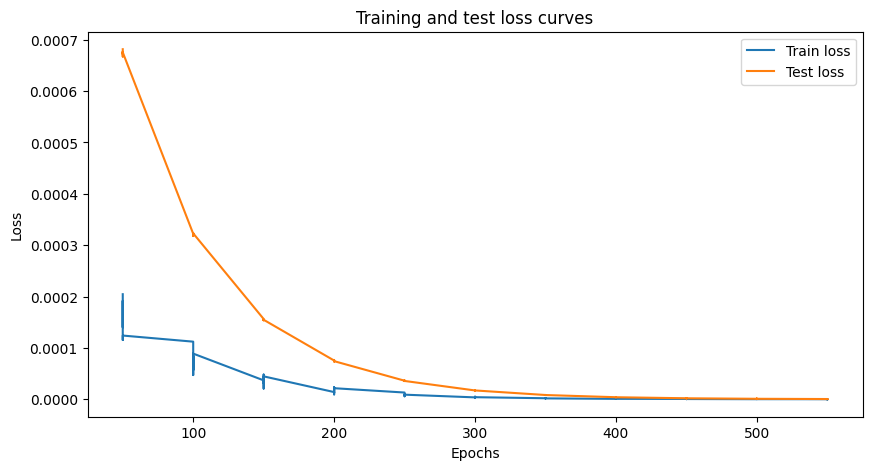

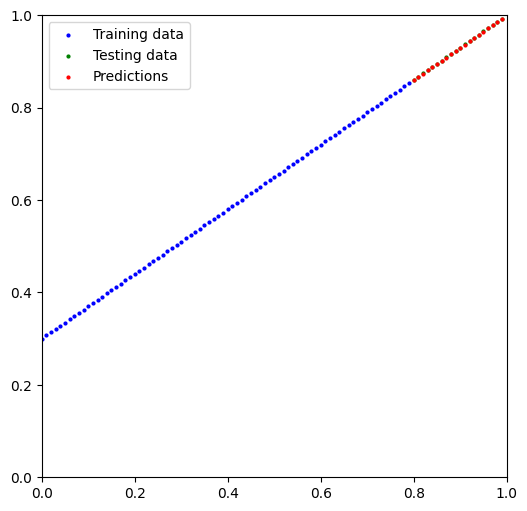

In [16]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

with torch.inference_mode(): 
    y_preds = model_0(X_test)

helper.plot_predictions(X_train, y_train, X_test, y_test, y_preds)